# Iris

In [1]:
data <- read.csv("iris.txt", header = T)

In [6]:
head(data)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1,-0.8976739,1.0286113,-1.336794,-1.308593,Iris-setosa
2,-1.1392005,-0.1245404,-1.336794,-1.308593,Iris-setosa
3,-1.3807271,0.3367203,-1.393470,-1.308593,Iris-setosa
4,-1.5014904,0.1060900,-1.280118,-1.308593,Iris-setosa
5,-1.0184372,1.2592416,-1.336794,-1.308593,Iris-setosa
6,-0.5353840,1.9511326,-1.166767,-1.046525,Iris-setosa


In [3]:
data$Class = factor(data$Class)

In [5]:
data$Sepal_length = scale(data$Sepal_length)
data$Sepal_width = scale(data$Sepal_width)
data$Petal_length = scale(data$Petal_length)
data$Petal_width = scale(data$Petal_width)

In [7]:
library(neuralnet)

In [8]:
train_test_split = function(data, fraction = 0.8, train = TRUE) {
  total_rows = nrow(data)
  train_rows = fraction * total_rows
  sample = 1:train_rows
  if (train == TRUE) {
    return (data[sample, ])
  } else {
    return (data[-sample, ])
  }
}

In [10]:
train <- train_test_split(data, 0.8, train = TRUE)
test <- train_test_split(data, 0.8, train = FALSE)

In [15]:
head(train)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1,-0.8976739,1.0286113,-1.336794,-1.308593,Iris-setosa
2,-1.1392005,-0.1245404,-1.336794,-1.308593,Iris-setosa
3,-1.3807271,0.3367203,-1.393470,-1.308593,Iris-setosa
4,-1.5014904,0.1060900,-1.280118,-1.308593,Iris-setosa
5,-1.0184372,1.2592416,-1.336794,-1.308593,Iris-setosa
6,-0.5353840,1.9511326,-1.166767,-1.046525,Iris-setosa


In [23]:
NN = neuralnet(
    Class ~ Sepal_length + Sepal_width + Petal_length + Petal_width,
    data = train,
    hidden = c(5, 5),
    linear.output = T
)

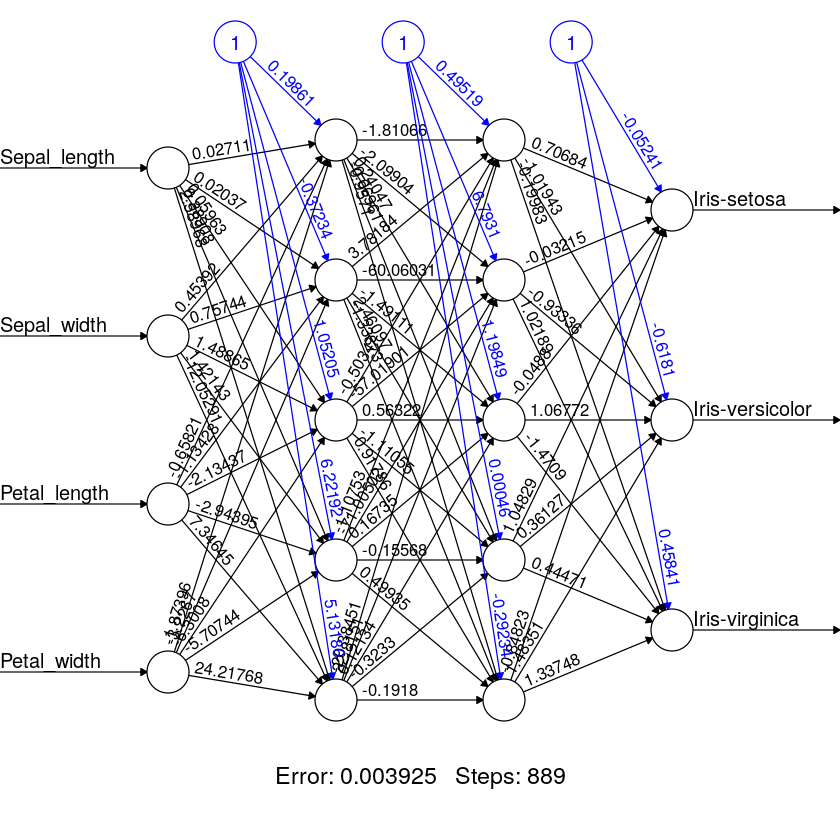

In [24]:
plot(NN, rep = "best")

In [25]:
head(train[, c(0:4)])

,Sepal_length,Sepal_width,Petal_length,Petal_width
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,-0.8976739,1.0286113,-1.336794,-1.308593
2,-1.1392005,-0.1245404,-1.336794,-1.308593
3,-1.3807271,0.3367203,-1.393470,-1.308593
4,-1.5014904,0.1060900,-1.280118,-1.308593
5,-1.0184372,1.2592416,-1.336794,-1.308593
6,-0.5353840,1.9511326,-1.166767,-1.046525


In [36]:
#pred_train = compute(NN, train[, c(0:4)])
pred_train = predict(NN, train[, c(0:4)])

In [33]:
?predict.nn

predict.nn {neuralnet},R Documentation
object,Neural network of class nn.
newdata,New data of class data.frame or matrix.
rep,Integer indicating the neural network's repetition which should be used.
all.units,Return output for all units instead of final output only.
...,further arguments passed to or from other methods.


In [28]:
install.packages('caret')

Retrieving 'https://cloud.r-project.org/src/contrib/caret_6.0-86.tar.gz' ...
	OK [downloaded 5 Mb in 1.3 secs]
Retrieving 'https://cloud.r-project.org/src/contrib/foreach_1.5.1.tar.gz' ...
	OK [downloaded 85.3 Kb in 0.2 secs]
Retrieving 'https://cloud.r-project.org/src/contrib/iterators_1.0.13.tar.gz' ...
	OK [downloaded 281.8 Kb in 0.2 secs]
Retrieving 'https://cloud.r-project.org/src/contrib/ModelMetrics_1.2.2.2.tar.gz' ...
	OK [downloaded 16.7 Kb in 0.1 secs]
Retrieving 'https://cloud.r-project.org/src/contrib/recipes_0.1.15.tar.gz' ...
	OK [downloaded 631.3 Kb in 0.3 secs]
Retrieving 'https://cloud.r-project.org/src/contrib/gower_0.2.2.tar.gz' ...
	OK [downloaded 135.5 Kb in 0.2 secs]
Retrieving 'https://cloud.r-project.org/src/contrib/ipred_0.9-9.tar.gz' ...
	OK [downloaded 172.2 Kb in 0.2 secs]
Retrieving 'https://cloud.r-project.org/src/contrib/prodlim_2019.11.13.tar.gz' ...
	OK [downloaded 123.1 Kb in 0.2 secs]
Retrieving 'https://cloud.r-project.org/src/contrib/lava_1.6.8.1.ta

In [29]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [30]:
cm <- confusionMatrix(pred_train, train['Class'])

ERROR: Error: `data` and `reference` should be factors with the same levels.
